## Introduction
The goal of the project is to Predict who is likely going to click on the Ad on a website based on the features of a user. Following are the features involved in this dataset which is obtained from Kaggle.

#### Steps involved in this Notebook

1. Getting to know about the Data
2. Extract New features
3. Check distribution of target variable
4. Understand Relationship between variables
5. Identifying Potential Outliers
6. Data Cleaning
7. Model Building
    1. Logistic Regression
    2. Naive Bayes
    3. Decision Trees
    4. Random Forest(without parameter tuning)
    5. Gradient Boosting
    6. SVM
    7. Random Forest(With Parameter Tuning)
8. Feature Importances

### Loading Libraries

In [1]:
#Importing libraries:
import pandas as pd #to modify dataframes
import numpy as np #for faster numerical calculations
import matplotlib.pyplot as plt #for plotting 
import seaborn as sns #also for plotting
from sklearn.model_selection import train_test_split #for splitting data into train and validation
from sklearn.preprocessing import StandardScaler #to standardize numerical variables 
import datetime as dt #to convert a column into datetime type
from scipy import stats #for few statistical problems
from scipy.stats import norm, skew #to check or plot normal and skewed distributions
import os
from scipy import stats as st #for few statistical problems
from sklearn import ensemble, tree, linear_model
import missingno as msno

### Loading Data

In [2]:
adv=pd.read_csv("advertising.csv")

# Understanding Data

In [3]:
adv.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
adv.shape

(1000, 10)

In [5]:
adv.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [6]:
#Inspecting the dataframe
# This function displays the datatype,levels 0f variables and number of levels in each column of the given train dataframe.here lambda is used to pass arguments
def inspect_data(data):
    return pd.DataFrame({"Data Type":data.dtypes,"No of Levels":data.apply(lambda x: x.nunique(),axis=0), "Levels":data.apply(lambda x: str(x.unique()),axis=0)})
inspect_data(adv)

,Data Type,No of Levels,Levels
Daily Time Spent on Site,float64,900,[68.95 80.23 69.47 74.15 68.37 59.99 88.91 66....
Age,int64,43,[35 31 26 29 23 33 48 30 20 49 37 24 41 36 40 ...
Area Income,float64,1000,[61833.9 68441.85 59785.94 54806.18 73889.99 5...
Daily Internet Usage,float64,966,[256.09 193.77 236.5 245.89 225.58 226.74 208....
Ad Topic Line,object,1000,['Cloned 5thgeneration orchestration' 'Monitor...
City,object,969,['Wrightburgh' 'West Jodi' 'Davidton' 'West Te...
Male,int64,2,[0 1]
Country,object,237,['Tunisia' 'Nauru' 'San Marino' 'Italy' 'Icela...
Timestamp,object,1000,['2016-03-27 00:53:11' '2016-04-04 01:39:02' '...
Clicked on Ad,int64,2,[0 1]


In [7]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [8]:
adv.dtypes

Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
City                         object
Male                          int64
Country                      object
Timestamp                    object
Clicked on Ad                 int64
dtype: object

### Statistical Summary

In [9]:
adv.describe(include='all')

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000,1000,1000,1000.00000
unique,NaN,NaN,NaN,NaN,1000,969,NaN,237,1000,NaN
top,NaN,NaN,NaN,NaN,Vision-oriented human-resource synergy,Williamsport,NaN,France,2016-03-20 08:22:50,NaN
freq,NaN,NaN,NaN,NaN,1,3,NaN,9,1,NaN
mean,65.000200,36.009000,55000.000080,180.000100,NaN,NaN,0.481000,NaN,NaN,0.50000
std,15.853615,8.785562,13414.634022,43.902339,NaN,NaN,0.499889,NaN,NaN,0.50025
min,32.600000,19.000000,13996.500000,104.780000,NaN,NaN,0.000000,NaN,NaN,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,NaN,NaN,0.000000,NaN,NaN,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,NaN,NaN,0.000000,NaN,NaN,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,NaN,NaN,1.000000,NaN,NaN,1.00000


### Checking for Duplicate values

In [10]:
adv.duplicated().sum() # displays duplicate records

0

In [11]:
#checking for duplicated rows
adv[adv.duplicated()]

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad


There are no duplications in the dataset

In [12]:
### Checking for missing values

In [13]:
#checking for null values in train
adv.isnull().sum(axis=0)

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

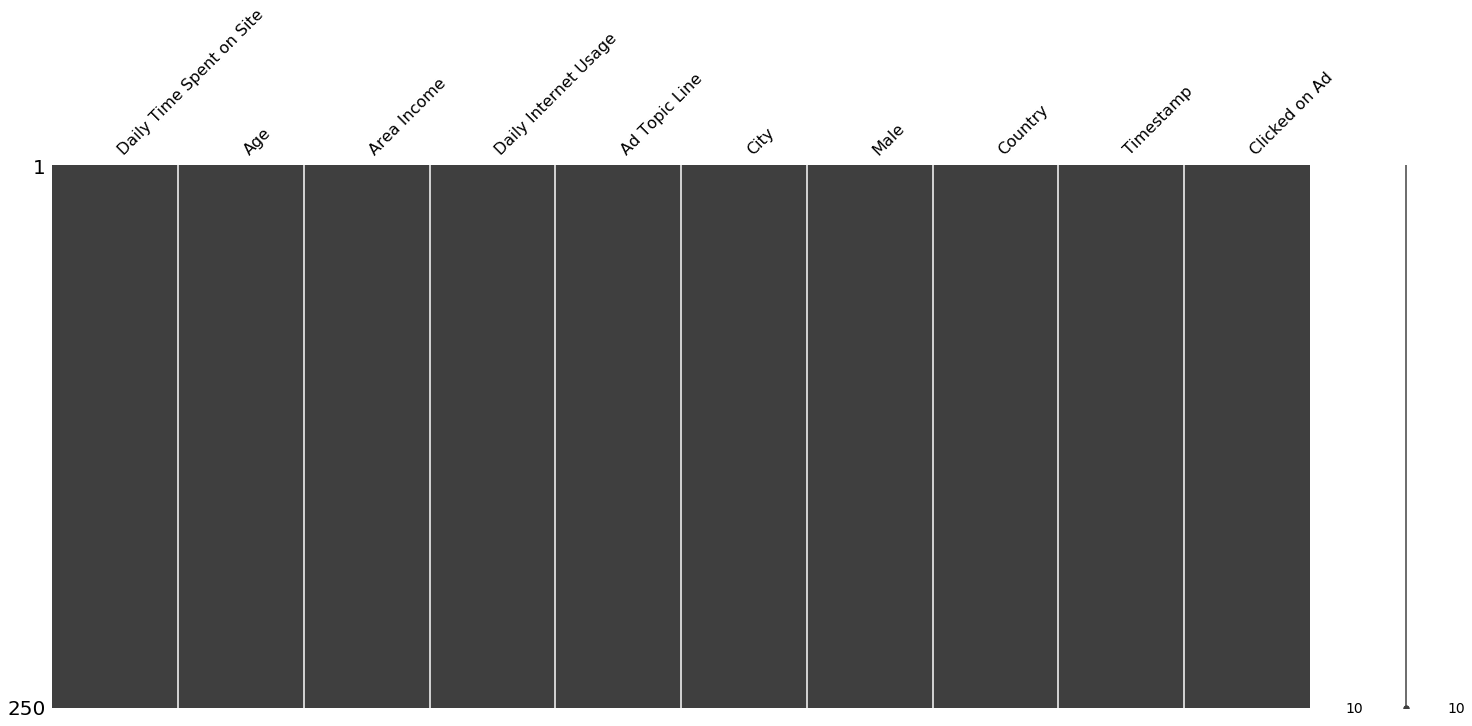

In [14]:
#Visualising missing values for a sample of 250

msno.matrix(adv.sample(250))

#Heatmap
#The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another:

#msno.heatmap(mobp)

#there are no missing values therefore nothing is displayed

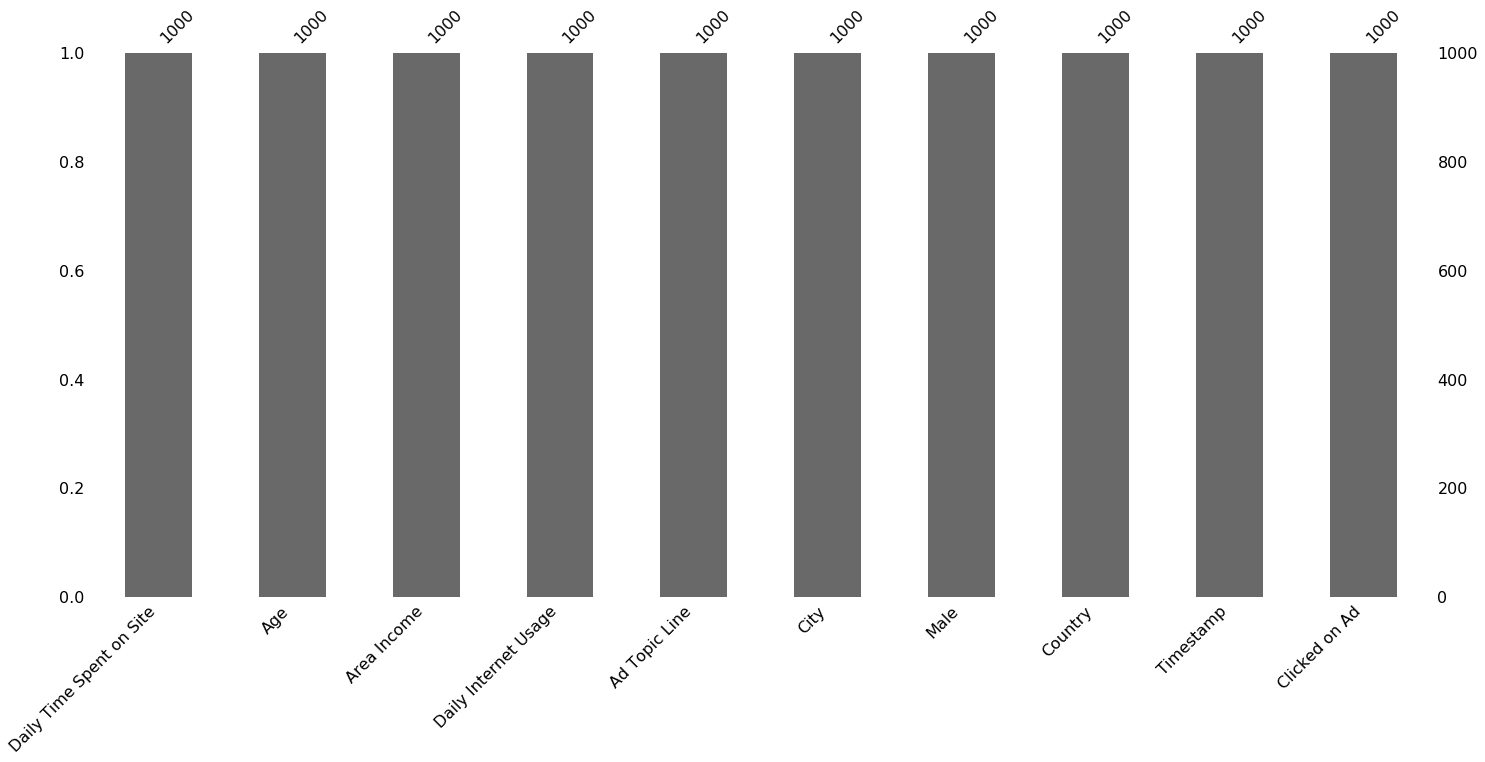

In [15]:
msno.bar(adv.sample(1000))
#no missing values

#Dendrogram
#The dendrogram allows you to more fully correlate variable completion, revealing trends deeper than the pairwise ones visible in the correlation heatmap:

#msno.dendrogram(mobp)

There are no missing values in the dataset

### Analysis on Datetime Variables

In [16]:
#We will change the datetime object
adv['Timestamp']=pd.to_datetime(adv['Timestamp'])


In [17]:
#Now we shall introduce new columns Hour,Day of Week, Date, Month from timestamp
adv['Hour']=adv['Timestamp'].apply(lambda time : time.hour)
adv['DayofWeek'] = adv['Timestamp'].apply(lambda time : time.dayofweek)
adv['Month'] = adv['Timestamp'].apply(lambda time : time.month)
adv['Date'] = adv['Timestamp'].apply(lambda t : t.date())


In [18]:
adv.head(2)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Hour,DayofWeek,Month,Date
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,0,6,3,2016-03-27
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,1,0,4,2016-04-04


In [19]:
adv.shape

(1000, 14)

### Estimating Skewness and Kurtosis

In [20]:
adv.skew()

Daily Time Spent on Site   -0.371760
Age                         0.479142
Area Income                -0.650373
Daily Internet Usage       -0.033537
Male                        0.076169
Clicked on Ad               0.000000
Hour                       -0.001035
DayofWeek                  -0.027938
Month                       0.090786
dtype: float64

In [21]:
adv.kurt()

Daily Time Spent on Site   -1.095534
Age                        -0.400524
Area Income                -0.099810
Daily Internet Usage       -1.272659
Male                       -1.998199
Clicked on Ad              -2.004012
Hour                       -1.224543
DayofWeek                  -1.212495
Month                      -1.186724
dtype: float64

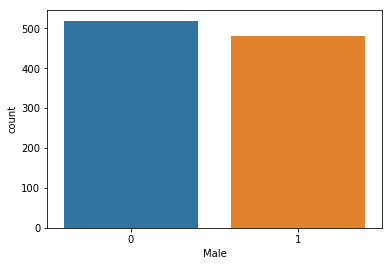

In [22]:
sns.countplot(adv['Male'])

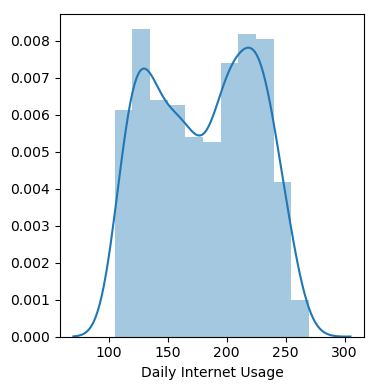

In [23]:
#checking the distribution of daily internet usage
cols =['Daily Internet Usage']
plt.figure(figsize=(20,4), dpi=100)
i = 1
for col in cols:
    plt.subplot(1,6,i)
    sns.distplot(adv[col])
    i = i+1
plt.tight_layout()
plt.show()

### Visualizations on Target Variable

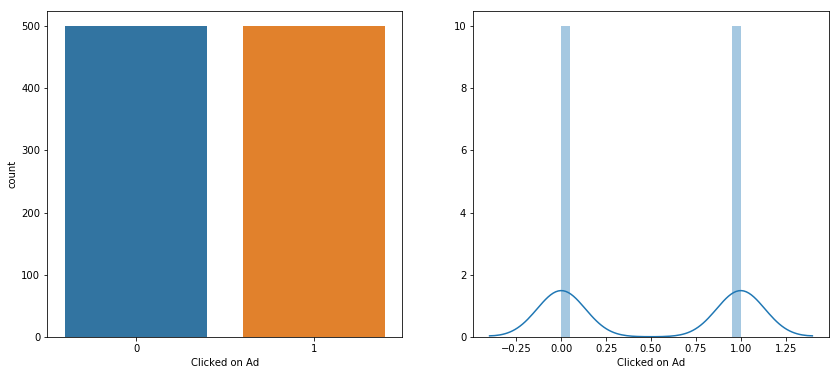

In [24]:
# Visualizing target variable Clicked on Ad
plt.figure(figsize = (14, 6)) 
plt.subplot(1,2,1)            
sns.countplot(x = 'Clicked on Ad', data = adv)
plt.subplot(1,2,2)
sns.distplot(adv["Clicked on Ad"], bins = 20)
plt.show()

So from the plot we can see that the number of users who click on a ad and who do not are equal in numbers i.e 500, that makes it very interesting.

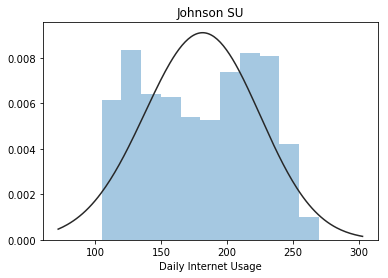

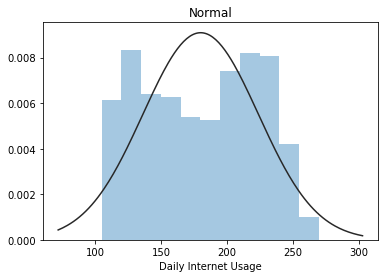

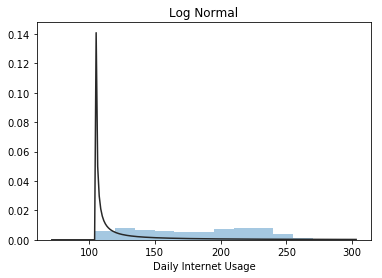

In [25]:
#checking for target variable
y = adv['Daily Internet Usage']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

It is apparent that Daily Internet usage doesn follow normal distribution, so it need not be transformed. 

### Checking relationship between variables using Pairplot

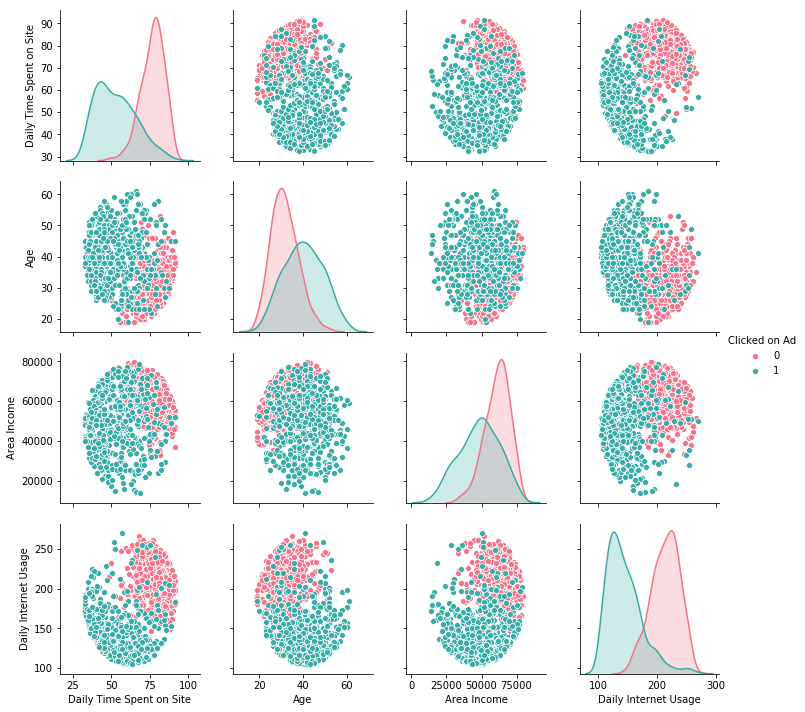

In [26]:
# Creating a pairplot with hue defined by Clicked on Ad column
sns.pairplot(adv, hue = 'Clicked on Ad', vars = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage'], palette = 'husl')

Pairplot represents the relationship between our target feature/variable and explanatory variables. It provides the possible direction of the relationship between the variables. We can see that people who spend less time on site and have less income and are aged more relatively are tend to click on ad.

### Differentiating Numerical and Categorical Variables

In [27]:
#recognising categorical and numerical features(use this only when all the given object type variables are categorical else use second method)
cat_features = adv.dtypes[adv.dtypes == 'object'].index
print('No of categorical fetures:',len(cat_features),'\n')
print(cat_features)
print('*'*100)

num_features = adv.dtypes[adv.dtypes != 'object'].index
print('No of numerical fetures:',len(num_features),'\n')
print(num_features)

No of categorical fetures: 4 

Index(['Ad Topic Line', 'City', 'Country', 'Date'], dtype='object')
****************************************************************************************************
No of numerical fetures: 10 

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Timestamp', 'Clicked on Ad', 'Hour',
       'DayofWeek', 'Month'],
      dtype='object')


### Summary of Numeric Features 

In [28]:
adv[num_features].describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Hour,DayofWeek,Month
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000,11.660000,3.064000,3.817000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025,6.960952,1.998474,1.926973
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000,0.000000,0.000000,1.000000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000,6.000000,1.000000,2.000000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000,12.000000,3.000000,4.000000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000,18.000000,5.000000,5.000000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000,23.000000,6.000000,7.000000


As the mean and median(50% percentile) are very similar to each other which indicates that our data is not skewed and we do not require any data transformations.We shall confirm this by visualizing as well.

### Summary of Categorical Features

In [29]:
adv[cat_features].describe(include = ['O'])

,Ad Topic Line,City,Country,Date
count,1000,1000,1000,1000
unique,1000,969,237,203
top,Vision-oriented human-resource synergy,Williamsport,France,2016-04-04
freq,1,3,9,12


As the cities are different(Unique) and also not many people belonging to a same city(freq). So, it probably means that this feature is having no or very less predictive power. However we have less diversity with country feature so we have to further investigate it.

In [30]:
pd.crosstab(index=adv['Country'],columns='count').sort_values(['count'], ascending=False).head(10)

col_0,count
Country,
France,9
Czech Republic,9
Afghanistan,8
Australia,8
Turkey,8
South Africa,8
Senegal,8
Peru,8
Micronesia,8


The maximum users are from france and czech republic with a count of 9 each

### Relation Between Variables

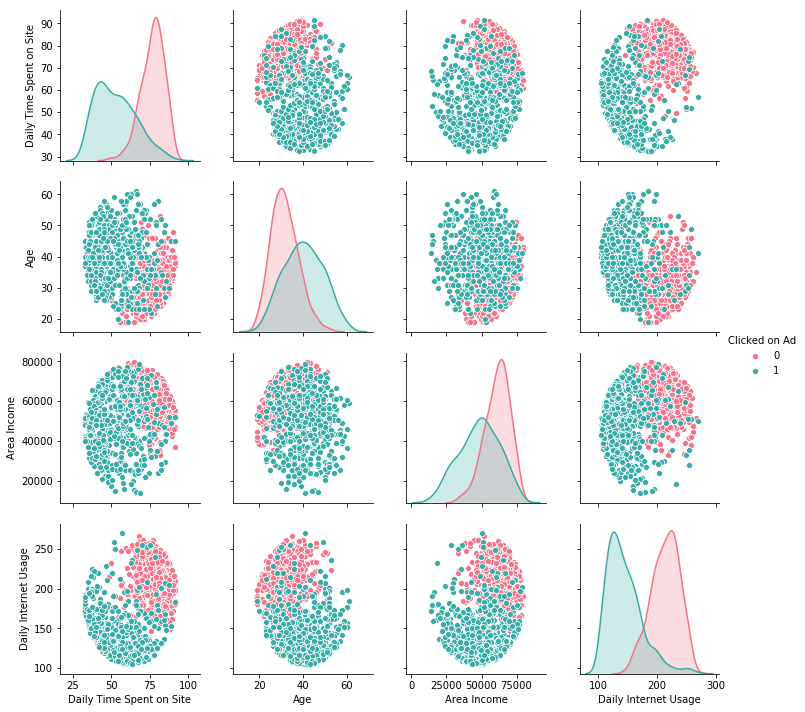

In [31]:
sns.pairplot(adv, hue = 'Clicked on Ad', vars = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage'], palette = 'husl')

### Correlation Between Variables

In [32]:
adv.corr()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Hour,DayofWeek,Month
Daily Time Spent on Site,1.000000,-0.331513,0.310954,0.518658,-0.018951,-0.748117,0.000895,0.018336,-0.010920
Age,-0.331513,1.000000,-0.182605,-0.367209,-0.021044,0.492531,-0.049905,0.013593,0.023689
Area Income,0.310954,-0.182605,1.000000,0.337496,0.001322,-0.476255,0.034573,0.013879,-0.050216
Daily Internet Usage,0.518658,-0.367209,0.337496,1.000000,0.028012,-0.786539,0.074347,0.009035,0.017530
Male,-0.018951,-0.021044,0.001322,0.028012,1.000000,-0.038027,0.058552,-0.038861,0.005220
Clicked on Ad,-0.748117,0.492531,-0.476255,-0.786539,-0.038027,1.000000,-0.047431,0.002003,0.016095
Hour,0.000895,-0.049905,0.034573,0.074347,0.058552,-0.047431,1.000000,0.007034,-0.013748
DayofWeek,0.018336,0.013593,0.013879,0.009035,-0.038861,0.002003,0.007034,1.000000,-0.020090
Month,-0.010920,0.023689,-0.050216,0.017530,0.005220,0.016095,-0.013748,-0.020090,1.000000


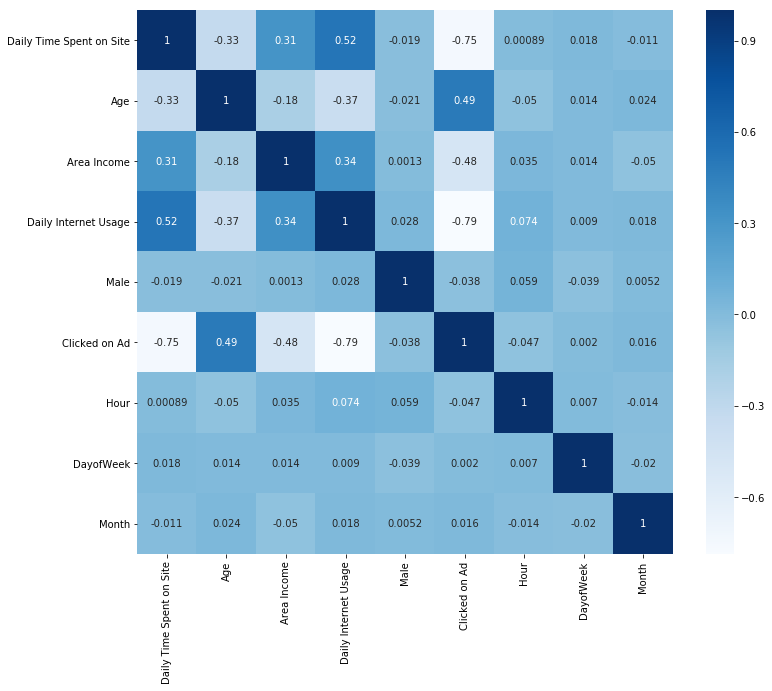

In [33]:
fig = plt.figure(figsize = (12,10))
sns.heatmap(adv.corr(), cmap='Blues', annot = True) 

In [34]:
### Distribution of Variables

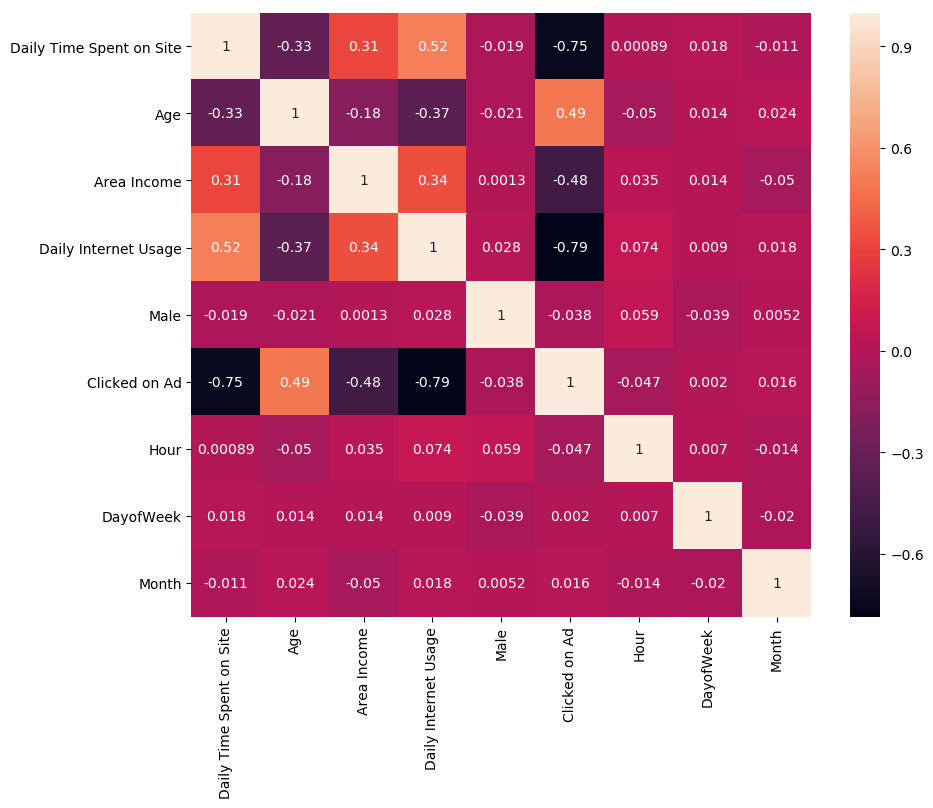

In [35]:
#checking correlation of all numerical variables
plt.figure(figsize=(10,8),dpi=100)
sns.heatmap(adv[num_features].corr(), annot=True)
plt.show()

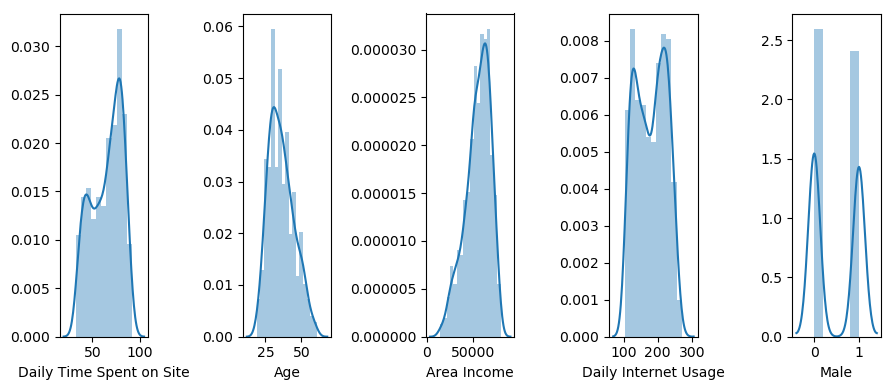

In [36]:
#checking the distribution of highly correlated numerical features with price variable
cols = ['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male']
plt.figure(figsize=(20,4), dpi=100)
i = 1
for col in cols:
    plt.subplot(1,11,i)
    #sns.distplot(car['price'])
    sns.distplot(adv[col])
    i = i+1
plt.tight_layout()
plt.show()

all features are not following normal distribution

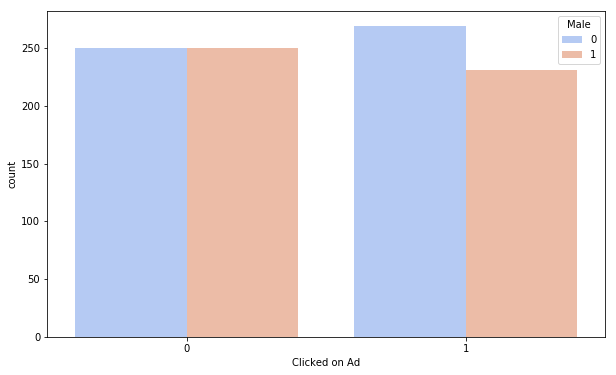

In [37]:
#Lets see Click on Ad features based on Sex
plt.figure(figsize=(10,6))
sns.countplot(x='Clicked on Ad',data=adv,hue='Male',palette='coolwarm')

Female tends to click more on Ads!

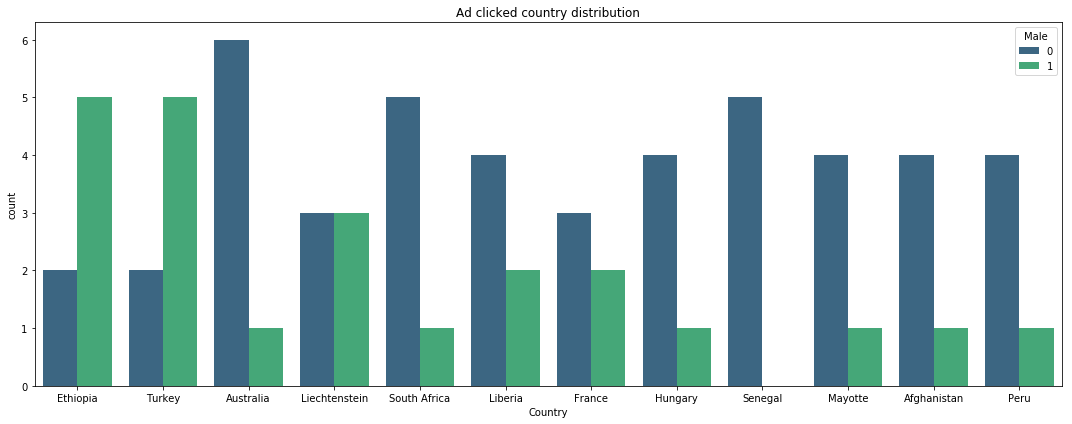

In [38]:
#Distribution of top 12 country's ad clicks based on Sex 
plt.figure(figsize=(15,6))
sns.countplot(x='Country',data=adv[adv['Clicked on Ad']==1],order=adv[adv['Clicked on Ad']==1]['Country'].value_counts().index[:12],hue='Male',
              palette='viridis')
plt.title('Ad clicked country distribution')
plt.tight_layout()


Most are developing countries and females are the active contributors.

Text(0.5,1,'Ad clicked hourly distribution')

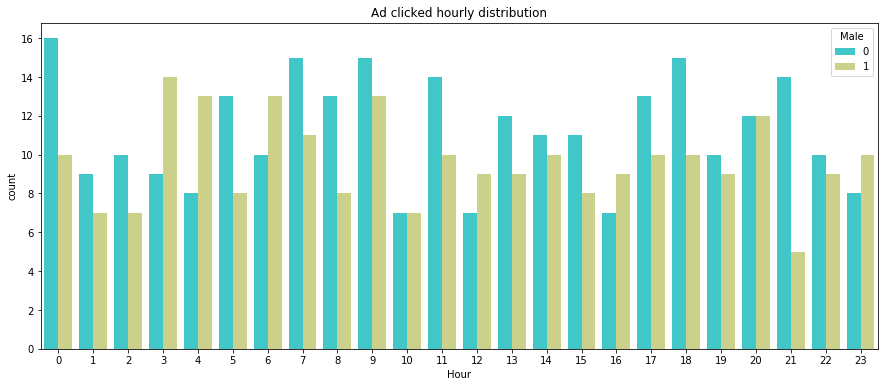

In [39]:
#Hourly distribution of ad clicks
plt.figure(figsize=(15,6))
sns.countplot(x='Hour',data=adv[adv['Clicked on Ad']==1],hue='Male',palette='rainbow')
plt.title('Ad clicked hourly distribution')

As we can see with uneven daytime frequency, females are the main contributor exceeding males several hours.

Text(0.5,1,'Ad clicked daily distribution')

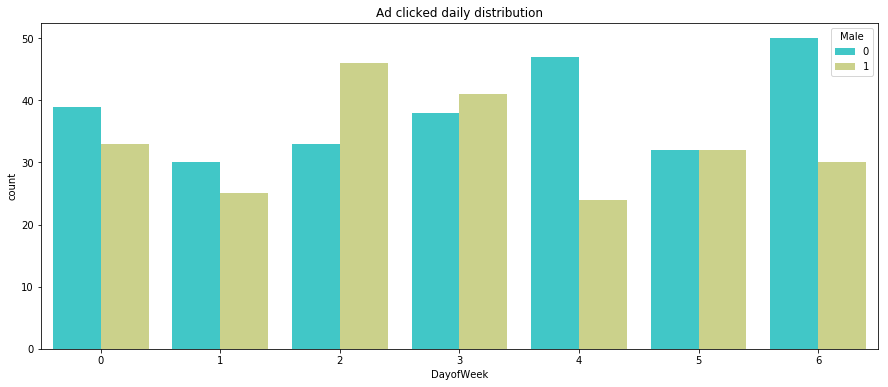

In [40]:
#Daily distribution of ad clicks
plt.figure(figsize=(15,6))
sns.countplot(x='DayofWeek',data=adv[adv['Clicked on Ad']==1],hue='Male',palette='rainbow')
plt.title('Ad clicked daily distribution')

Most of the Days Ladies click ad more than Males except Wednesdays and Thursdays.

Text(0.5,1,'Ad clicked monthly distribution')

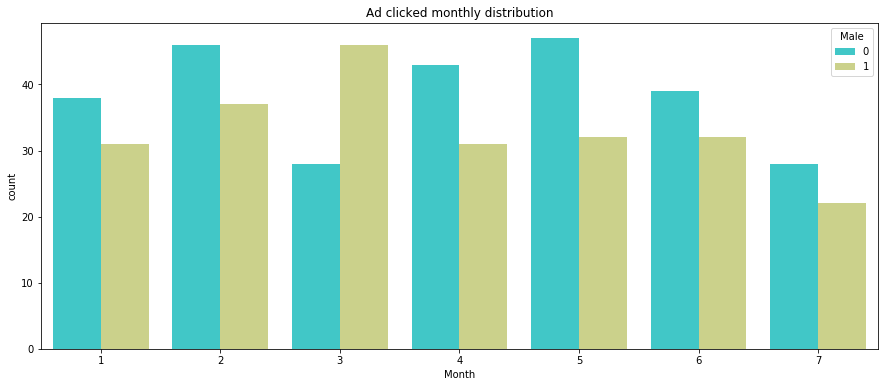

In [41]:
#Monthly distribution of ad clicks
plt.figure(figsize=(15,6))
sns.countplot(x='Month',data=adv[adv['Clicked on Ad']==1],hue='Male',palette='rainbow')
plt.title('Ad clicked monthly distribution')

Throughout the Year Ladies click on Ad the most except month of March.

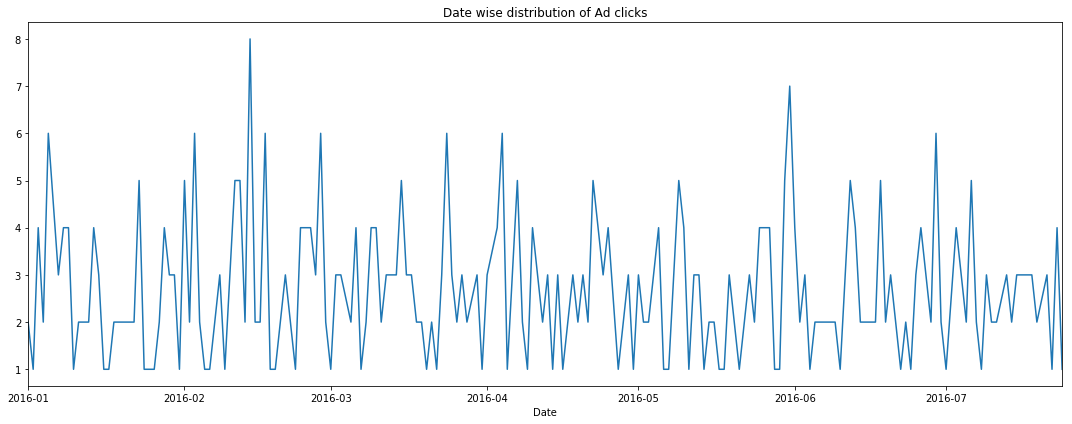

In [42]:
#Now we shall group by date and see the
plt.figure(figsize=(15,6))
adv[adv['Clicked on Ad']==1].groupby('Date').count()['Clicked on Ad'].plot()
plt.title('Date wise distribution of Ad clicks')
plt.tight_layout()


In [43]:
#Top Ad clicked on specific date
adv[adv['Clicked on Ad']==1]['Date'].value_counts().head(5)

2016-02-14    8
2016-05-31    7
2016-02-28    6
2016-01-05    6
2016-03-24    6
Name: Date, dtype: int64

On 14th February 2016 we see most (8) clicks on ad. So Valentine Day is the best selling day for the Company's Ad.

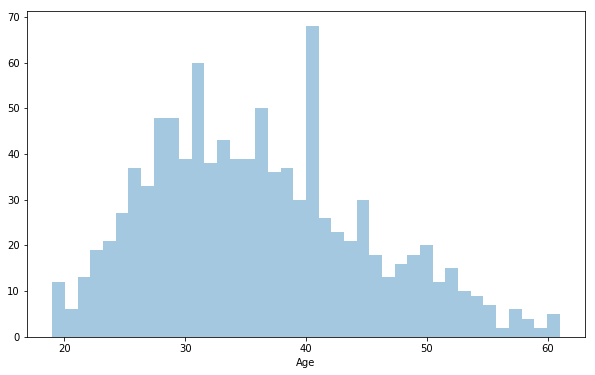

In [44]:
#Lets see Age distribution
plt.figure(figsize=(10,6))
sns.distplot(adv['Age'],kde=False,bins=40)

Most of them are around 30 years. But is this age group clicking most on Ad?

Text(0.5,1,'Age wise distribution of Ad clicks')

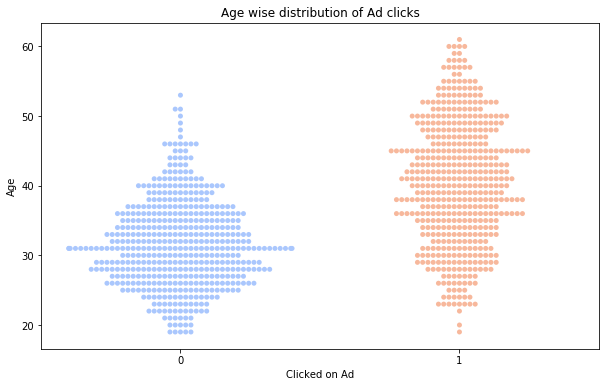

In [45]:
#Lets see Age distribution
plt.figure(figsize=(10,6))
sns.swarmplot(x=adv['Clicked on Ad'],y= adv['Age'],data=adv,palette='coolwarm')
plt.title('Age wise distribution of Ad clicks')

As its clear from above that around 40 years population are the most contributor to ad clickings and not around 30 years.

Text(200,60,'Daily Internet Usage')

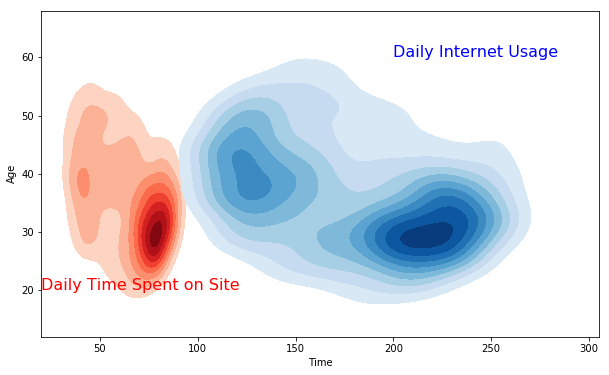

In [46]:
#Lets see Daily internet usage and daily time spent on site based on age
fig, axes = plt.subplots(figsize=(10, 6))
ax = sns.kdeplot(adv['Daily Time Spent on Site'], adv['Age'], cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(adv['Daily Internet Usage'],adv['Age'] ,cmap="Blues", shade=True, shade_lowest=False)
ax.set_xlabel('Time')
ax.text(20, 20, "Daily Time Spent on Site", size=16, color='r')
ax.text(200, 60, "Daily Internet Usage", size=16, color='b')

As we can see people around 30 years population devote lot of their time on internet and on the site, but they don't click on Ads that frequent. Comapred to them, around 40 years population spend a bit less time but click on Ads more.



Text(0.5,1,'Clicked on Ad distribution based on area distribution')

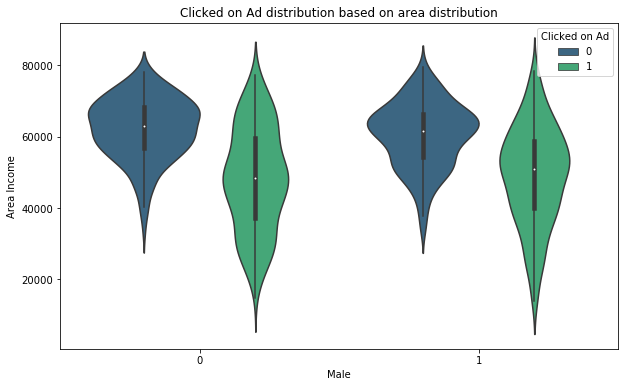

In [47]:
#Lets see the distribution who clicked on Ad based on area income of sex 
plt.figure(figsize=(10,6))
sns.violinplot(x=adv['Male'],y=adv['Area Income'],data=adv,palette='viridis',hue='Clicked on Ad')
plt.title('Clicked on Ad distribution based on area distribution')

Both Males and Females with Area income less than 50k are main customers of Ad. As almost all whose income more than 60k are not interested on clicking on Ad.

Thus in conclusion, mostly around 40 years Female within income group less than 50k in developing countries are the main consumers of Ad, clicking unevenly throughout the day and mostly during Fridays and Sundays

### Clickes Vs Not Clicked

In [48]:
adv.groupby('Clicked on Ad')['Clicked on Ad', 'Daily Time Spent on Site', 'Age', 'Area Income', 
                            'Daily Internet Usage'].mean()

,Clicked on Ad,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
Clicked on Ad,,,,,
0,0.0,76.85462,31.684,61385.58642,214.51374
1,1.0,53.14578,40.334,48614.41374,145.48646


In [49]:
adv.groupby(['Male','Clicked on Ad'])['Clicked on Ad'].count().unstack()

Clicked on Ad,0,1
Male,,
0,250,269
1,250,231


Distribution of clicks by gender. It seems that more number of females have clicked on ad.

## Data Cleaning

In [51]:
adv.dtypes

Daily Time Spent on Site           float64
Age                                  int64
Area Income                        float64
Daily Internet Usage               float64
Ad Topic Line                       object
City                                object
Male                                 int64
Country                             object
Timestamp                   datetime64[ns]
Clicked on Ad                        int64
Hour                                 int64
DayofWeek                            int64
Month                                int64
Date                                object
dtype: object

In [52]:
#date is dropped above
adv.drop(['Timestamp'],axis=1,inplace=True)

In [53]:
adv.drop(['Date'],axis=1,inplace=True)

In [54]:
# Sagregrating categorical and numeric columns names with price so that in coming steps we can use these to directly in datatype conversion of the columns
cat_cols = ["Ad Topic Line", "City", "Country"]
num_cols = adv.columns.difference(cat_cols)
num_cols


Index(['Age', 'Area Income', 'Clicked on Ad', 'Daily Internet Usage',
       'Daily Time Spent on Site', 'DayofWeek', 'Hour', 'Male', 'Month'],
      dtype='object')

In [55]:
# Converting user specified columns in train and test dataframes into a category variables
adv[cat_cols]=adv[cat_cols].apply(lambda x:x.astype("category"))

In [56]:
# Converting user specified columns train and test dataframes into a numeric i.e, float
adv[num_cols]=adv[num_cols].apply(lambda x:x.astype("float"))

In [57]:
adv.dtypes

Daily Time Spent on Site     float64
Age                          float64
Area Income                  float64
Daily Internet Usage         float64
Ad Topic Line               category
City                        category
Male                         float64
Country                     category
Clicked on Ad                float64
Hour                         float64
DayofWeek                    float64
Month                        float64
dtype: object

In [58]:
#Lets take country value as dummies
country= pd.get_dummies(adv['Country'],drop_first=True)


In [59]:
#Now lets drop the columns not required for building a model
adv.drop(['Ad Topic Line','City','Country'],axis=1,inplace=True)

In [60]:
# creating a dataframe churn to store train.Churn values
ClickonAd=adv['Clicked on Ad']

In [61]:
#Dropping the Churn column from train before splitting
adv.drop('Clicked on Ad',axis=1,inplace=True)

In [62]:
# Splitting train dataframe into trainx, trainy, valx and valy on the dependent variable or target variable churn
trainx,valx,trainy,valy = train_test_split(adv,ClickonAd,test_size=0.2,random_state=1)

In [63]:
print(trainx.shape)
print(valx.shape)
print(trainy.shape)
print(valy.shape)

(800, 8)
(200, 8)
(800,)
(200,)


Here we are done with the EDA and data cleaning part

Now the data is ready to deal with ML Algorithms